In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [44]:
data = pd.read_csv(r'sales_subset.txt')

In [45]:
data

,Unnamed: 0,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808
...,...,...,...,...,...,...,...,...,...,...
10769,10769,39,A,99,2011-12-09,895.00,False,9.644444,0.834256,7.716
10770,10770,39,A,99,2012-02-03,350.00,False,15.938889,0.887619,7.244
10771,10771,39,A,99,2012-06-08,450.00,False,27.288889,0.911922,6.989
10772,10772,39,A,99,2012-07-13,0.06,False,25.644444,0.860145,6.623


In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10774 entries, 0 to 10773
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            10774 non-null  int64  
 1   store                 10774 non-null  int64  
 2   type                  10774 non-null  object 
 3   department            10774 non-null  int64  
 4   date                  10774 non-null  object 
 5   weekly_sales          10774 non-null  float64
 6   is_holiday            10774 non-null  bool   
 7   temperature_c         10774 non-null  float64
 8   fuel_price_usd_per_l  10774 non-null  float64
 9   unemployment          10774 non-null  float64
dtypes: bool(1), float64(4), int64(3), object(2)
memory usage: 768.2+ KB


In [47]:
data = data.drop(['Unnamed: 0'],axis=1)
data

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
1,1,A,1,2010-03-05,21827.90,False,8.055556,0.693452,8.106
2,1,A,1,2010-04-02,57258.43,False,16.816667,0.718284,7.808
3,1,A,1,2010-05-07,17413.94,False,22.527778,0.748928,7.808
4,1,A,1,2010-06-04,17558.09,False,27.050000,0.714586,7.808
...,...,...,...,...,...,...,...,...,...
10769,39,A,99,2011-12-09,895.00,False,9.644444,0.834256,7.716
10770,39,A,99,2012-02-03,350.00,False,15.938889,0.887619,7.244
10771,39,A,99,2012-06-08,450.00,False,27.288889,0.911922,6.989
10772,39,A,99,2012-07-13,0.06,False,25.644444,0.860145,6.623


In [48]:
data['type'].unique()

array(['A', 'B'], dtype=object)

<AxesSubplot:>

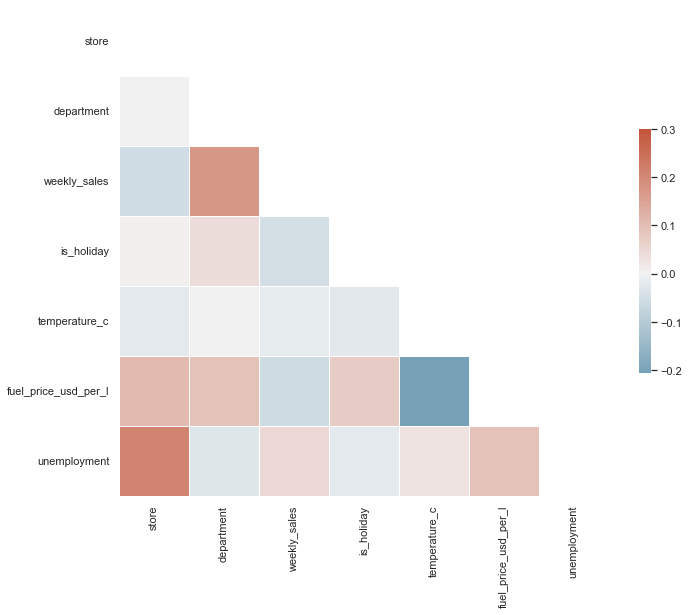

In [49]:
sns.set_theme(style="white")

# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [50]:
data['store'].unique()

array([ 1,  2,  4,  6, 10, 13, 14, 19, 20, 27, 31, 39])

In [51]:
data.drop_duplicates(subset='store', keep='first')

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
0,1,A,1,2010-02-05,24924.50,False,5.727778,0.679451,8.106
901,2,A,1,2010-02-05,35034.06,False,4.550000,0.679451,8.324
1798,4,A,1,2010-02-05,38724.42,False,6.533333,0.686319,8.623
2699,6,A,1,2010-02-05,25619.00,False,4.683333,0.679451,7.259
3593,10,B,1,2010-02-05,40212.84,False,12.411111,0.782478,9.765
4495,13,A,1,2010-02-05,46761.90,False,-0.261111,0.704283,8.316
5408,14,A,1,2010-02-05,32842.31,False,-2.605556,0.735455,8.992
6293,19,A,1,2010-02-05,21500.58,False,-6.133333,0.780365,8.350
7199,20,A,1,2010-02-05,46021.21,False,-3.377778,0.735455,8.187
8109,27,A,1,2010-02-05,32313.79,False,-2.672222,0.780365,8.237


### Most Profitable & Loss Making Store

In [52]:
print("-------Maximum Sales by Store----------")
print( data.groupby('store')['weekly_sales'].max())
print("\n-------Maximum Sales by Store----------")
print(data.groupby('store')['weekly_sales'].min())

-------Maximum Sales by Store----------
store
1     140504.41
2     178982.89
4     165765.50
6     119812.38
10    232558.51
13    166872.27
14    293966.05
19    147449.06
20    195223.84
27    177605.86
31    131062.82
39    114691.10
Name: weekly_sales, dtype: float64

-------Maximum Sales by Store----------
store
1     -698.0
2    -1098.0
4      -88.0
6     -698.0
10    -798.0
13     -98.0
14    -498.0
19    -449.0
20    -598.0
27    -409.0
31    -224.0
39    -159.0
Name: weekly_sales, dtype: float64


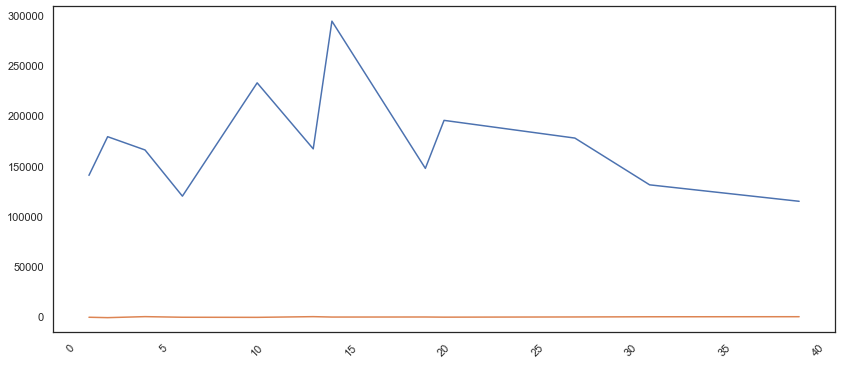

In [53]:
plt.figure(figsize=(14,6))
plt.xticks(rotation = 45)
plt.plot(data.groupby('store')['weekly_sales'].max())
plt.plot(data.groupby('store')['weekly_sales'].min())

In [54]:
print("-------Maximum Sales by Type----------")
print(data.groupby('type')['weekly_sales'].max())
print("-------Minimum Sales by Type----------")
print(data.groupby('type')['weekly_sales'].min())

-------Maximum Sales by Type----------
type
A    293966.05
B    232558.51
Name: weekly_sales, dtype: float64
-------Minimum Sales by Type----------
type
A   -1098.0
B    -798.0
Name: weekly_sales, dtype: float64


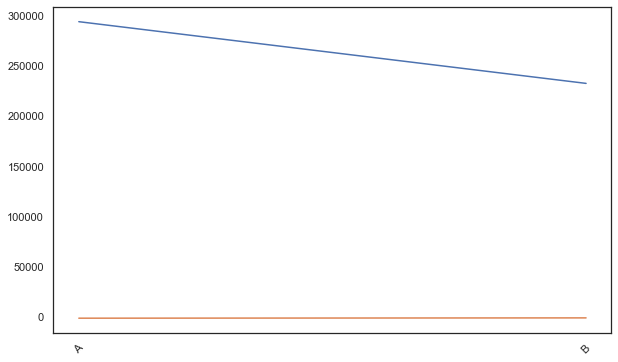

In [55]:
plt.figure(figsize=(10,6))
plt.xticks(rotation = 45)
plt.plot(data.groupby('type')['weekly_sales'].max())
plt.plot(data.groupby('type')['weekly_sales'].min())

### Most Profitable & Loss Making Department of Store10

In [72]:
store10 = data[data["store"]==10]
store10

,store,type,department,date,weekly_sales,is_holiday,temperature_c,fuel_price_usd_per_l,unemployment
3593,10,B,1,2010-02-05,40212.84,False,12.411111,0.782478,9.765
3594,10,B,1,2010-03-05,36572.44,False,13.288889,0.760023,9.765
3595,10,B,1,2010-04-02,131853.01,False,17.588889,0.815235,9.524
3596,10,B,1,2010-05-07,29819.93,False,21.700000,0.826066,9.524
3597,10,B,1,2010-06-04,27739.80,False,28.233333,0.776930,9.524
...,...,...,...,...,...,...,...,...,...
4490,10,B,98,2010-09-03,300.25,False,28.777778,0.815500,9.199
4491,10,B,98,2010-10-01,46.00,False,30.005556,0.792781,9.003
4492,10,B,98,2010-11-05,1075.30,False,21.688889,0.794894,9.003
4493,10,B,98,2010-12-03,999.42,False,10.650000,0.803348,9.003


In [61]:
store10['department'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
       36, 37, 38, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 52, 54, 55,
       56, 58, 59, 60, 67, 71, 72, 74, 77, 78, 79, 80, 81, 82, 83, 85, 87,
       90, 91, 92, 93, 94, 95, 96, 97, 98])

In [71]:
store10.groupby('department')['weekly_sales'].max().tail(25)

department
58      9560.00
59      8023.24
60       880.00
67     29012.95
71     26617.72
72    232558.51
74     56702.80
77      1590.00
78        12.00
79     52545.04
80       159.62
81     12859.76
82     29131.29
83       795.40
85      3548.01
87     26394.89
90     16873.50
91     16363.10
92     57181.98
93      1730.84
94      1903.68
95     94868.27
96     10576.00
97      6720.96
98      1075.30
Name: weekly_sales, dtype: float64

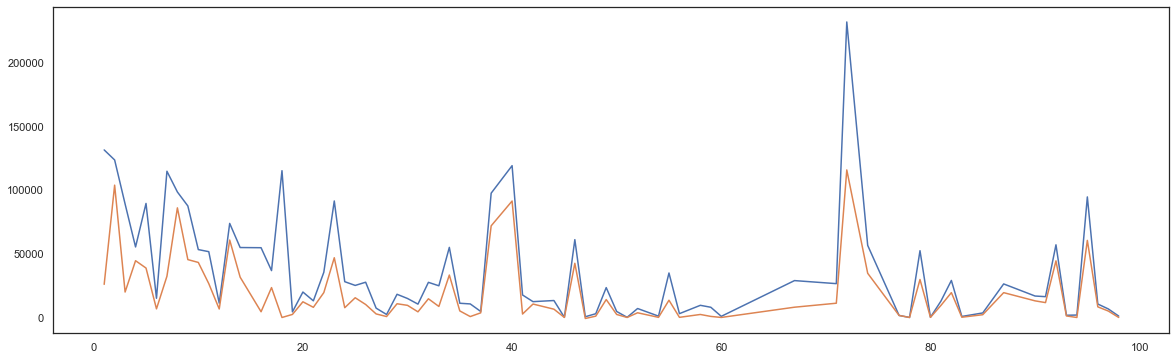

In [65]:
plt.figure(figsize=(20,6))
plt.plot(store10.groupby('department')['weekly_sales'].max())
plt.plot(store10.groupby('department')['weekly_sales'].min())

In [75]:
store10dep72 = store10[store10['department']==72]  # Most Profitable Department
store10dep78 = store10[store10['department']==78]  # Loss Making Department

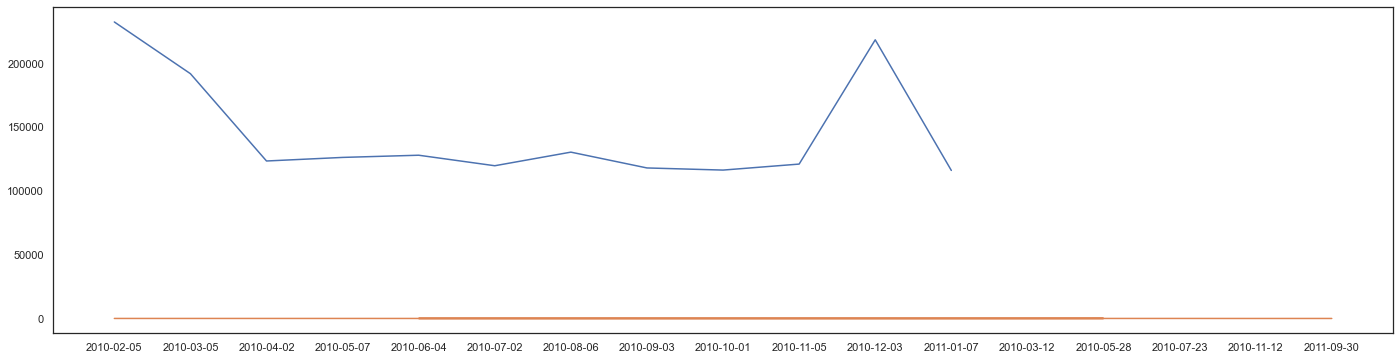

In [80]:
plt.figure(figsize=(24,6))
plt.plot(store10dep72["date"],store10dep72["weekly_sales"])
plt.plot(store10dep78["date"],store10dep78["weekly_sales"])